### Portfolio: Walmart Weekly Sales Forecast - Exploratory Data Analysis ###

**Problem Statement:** You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains several departments, and you are tasked with predicting the department-wide sales for each store. In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

**Stakeholders:** Walmart store managers, regional operational directors, data science team

## Part A. Import Cleaned Dataset ##

In [1]:
# Import all libraries #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Authorization #
__author__ = "Taesun Yoo"
__email__ = "yoots1988@gmail.com"

In [2]:
#################################
# Part 2 - Discover the Problem #
#################################
# Write a group of funtions:
def load_file(file):
    '''load the input file CSVs'''
    df = pd.read_csv(file)
    return df

def clean_data(raw_df, col_name):
    '''drop the duplicate rows based on specified column'''
    cleand_df = raw_df.drop_duplicates(subset=col_name)
    return cleand_df

def EDA_drop_column(df, var_list):
    '''drop column(s) by a list'''
    df.drop(var_list, axis=1, inplace=True)
    return df

def EDA_convert_dt_type(df, var_name):
    '''Convert data type as an object'''
    df[var_name] = df[var_name].astype('object')

def EDA_convert_object_to_cat(df):
    '''convert object to category data types'''
    for col in df.columns:
        if df[col].dtype.name == 'object':
            df[col] = df[col].astype('category')

def EDA_missing_data(cleaned_df):
    '''performs the missing % on dataframe'''
    missing_df = pd.DataFrame(cleaned_df.isnull().sum())
    missing_df.columns = ['count']
    missing_df['pct'] = (missing_df['count']/len(cleaned_df))*100
    return missing_df

def EDA_stat_numerical(cleaned_df):
    '''performs the summary statistics on numerical vars'''
    summary_df_num = cleaned_df.describe(include='float64').T
    summary_df_num = pd.DataFrame(summary_df_num)[['count','std','min','mean','max','25%','50%','75%']]
    return summary_df_num

def EDA_stat_categorical(cleaned_df):
    '''performs the summary statistics on categorical vars'''
    summary_df_cat = cleaned_df.describe(include='O').T
    summary_df_cat = pd.DataFrame(summary_df_cat)
    return summary_df_cat

def EDA_compute_IQR(df, var_name):
    '''Compute the Interquartile Range and print the outliers'''
    df['IQR'] = df['75%'] - df['25%']
    df['LB'] = df['25%'] - 1.5*df['IQR']
    df['UB'] = df['75%'] + 1.5*df['IQR']
    print('The LB and UB for suspected '+var_name+' outliers are {} and {}.'.format(df['LB'].loc[var_name], df['UB'].loc[var_name]))
    return df

def EDA_plot_num_var(df, num_var):
    '''plot a boxplot and distribution plot for numerical variables'''
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    sns.boxplot(df[num_var])
    plt.subplot(1,2,2)
    sns.distplot(df[num_var], bins=20)
    plt.show()
    
def EDA_plot_hist_label(df, num_var, cat_var, bins, lab_list):
    '''split a dataframe by categories and plot a histogram'''
    for i in lab_list:
        df_by_label = df[num_var][df[cat_var]==i]
        plt.hist(df_by_label, bins=bins, label=i)
        plt.title('Histogram of ' + str(num_var))
        plt.xlabel(str(num_var))
        plt.ylabel('Weekly Transactions')

def EDA_plot_hist_2by2(df, var1, bin1,
                       var2, bin2,
                       var3, bin3,
                       var4, bin4, factor=None):
    '''Print skewness and plot the histograms'''
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    #subplot 1
    print("skewness is:" +var1, df[var1].skew())
    plt.subplot(2,2,1)
    plt.hist(df[var1]*factor, color='green', bins=bin1)
    plt.title('Histogram of '+var1)
    plt.xlabel(var1)
    plt.ylabel('Weekly Transactions')
    #subplot 2
    print("skewness is:" +var2, df[var2].skew())
    plt.subplot(2,2,2)
    plt.hist(df[var2]*factor, color='blue', bins=bin2)
    plt.title('Histogram of '+var2)
    plt.xlabel(var2)
    plt.ylabel('Weekly Transactions')
    #subplot 3
    print("skewness is:" +var3, df[var3].skew())
    plt.subplot(2,2,3)
    plt.hist(df[var3]*factor, color='orange', bins=bin3)
    plt.title('Histogram of '+var3)
    plt.xlabel(var3)
    plt.ylabel('Weekly Transactions')
    #subplot 4
    print("skewness is:" +var4, df[var4].skew())
    plt.subplot(2,2,4)
    plt.hist(df[var4]*factor, color='purple', bins=bin4)
    plt.title('Histogram of '+var4)
    plt.xlabel(var4)
    plt.ylabel('Weekly Transactions')
 
def split_data_by_label(df, lab):
    '''set label as an index to split dataframes'''
    df_label = df.set_index(lab)
    df_label_0, df_label_1 = df_label.loc[0], df_label.loc[1]
    return (df_label_0, df_label_1)

def group_data_by_label(df, lab, cat_var):
    df_grp = pd.DataFrame(df.groupby([lab, cat_var])[cat_var].count())
    df_grp.columns = ['count']
    df_grp_0 = df_grp.loc[0]
    df_grp_1 = df_grp.loc[1]
    return (df_grp_0, df_grp_1)

def plot_pie_charts(df_0, df_1, label, var_name):
    '''Plot a series of pie charts by a label'''
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    plt.subplots_adjust(hspace=.5, wspace=.5)
    # subplot for non group label:
    ax1.pie(df_0, autopct='%.0f%%',
            wedgeprops={'edgecolor':'white'}, textprops={'fontsize':14})
    ax1.set_title('Non-Holiday Weekly Transactions '+ 'by '+ var_name, fontsize=13)
    ax1.legend(labels = label, loc='upper right')
    # subplot for group label:
    ax2.pie(df_1, autopct='%.0f%%',
            wedgeprops={'edgecolor':'white'}, textprops={'fontsize':14})
    ax2.set_title('Holiday Weekly Transactions '+ 'by '+ var_name, fontsize=13)
    ax2.legend(labels = label, loc='upper right')

def EDA_plot_freq_chart(df, cat_var):
    '''computes frequency chart'''
    plt.figure(figsize=(15,15))
    var_count = df[cat_var].value_counts(ascending=False)
    sns.barplot(var_count.index, var_count.values, order=var_count.index, alpha=0.9)
    plt.title('Weekly Sales Transactions by '+ cat_var)
    plt.ylabel('# of Weekly Transactions')
    plt.xlabel(cat_var, fontsize=10)
    plt.xticks(rotation=270)
    plt.show()

def EDA_plot_mean_cat_chart(df, num_var, cat_var1, cat_var2):
    '''plot 2by1 avg. label bar charts based on categorical vars'''
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # plot 1
    plt.subplot(2,1,1)
    df.groupby(cat_var1)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var1)
    plt.ylabel('Mean '+ num_var)
    plt.title('Mean ' + num_var + ' by '+ cat_var1)
    # plot 2
    plt.subplot(2,1,2)
    df.groupby(cat_var2)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var2)
    plt.ylabel('Mean '+ num_var)
    plt.title('Mean ' + num_var + ' by '+ cat_var2)    

def EDA_plot_box(df, num_var, cat_var, hue=None):
    '''plot the box-whisker'''
    df.sort_values(by=[num_var, cat_var], ascending=False, inplace=True)
    plt.figure(figsize=(15,15))
    sns.set(style='whitegrid')
    sns.boxplot(cat_var, num_var, hue, df)
    plt.title('Box plot of '+ num_var + ' by '+ cat_var)
    plt.xticks(rotation=270, fontsize=9)
    
def EDA_plot_corr_matrix(df):
    '''plot correlation matrix'''
    cm = df[features + label].corr()
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)]=True
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                annot=True, fmt='.2f', mask=mask)
    plt.xticks(rotation=90)
    plt.show()
    
def EDA_plot_crosstab(df, cat_var1, cat_var2):
    ct = pd.crosstab(df[cat_var1], df[cat_var2])
    df_ct = pd.DataFrame(ct)
    return df_ct

def EDA_plot_scatter(df, lab, var1, c1, 
                     var2, c2, factor=None):
    '''plot scatter plots 2by1'''
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # plot 1
    plt.subplot(2,1,1)
    plt.scatter(df[var1]*factor, df[lab], color=c1)
    plt.title('Relationship between '+ lab + ' and ' + var1)
    plt.xlabel(var1)
    plt.ylabel(lab)
    # plot 2
    plt.subplot(2,1,2)
    plt.scatter(df[var2]*factor, df[lab], color=c2)
    plt.title('Relationship between '+ lab + ' and ' + var2)
    plt.xlabel(var2)
    plt.ylabel(lab)

def EDA_plot_multi_facet_scatter(df_1, df_2, var_x, var_y):
    '''plot multi-faceted scatter plot by a categorical factor'''
    plt.subplots_adjust(hspace=.2, wspace=.2)
    plt.scatter(df_1[var_x], df_1[var_y], label='Holiday', edgecolor='w')
    plt.scatter(df_2[var_x], df_2[var_y], label='Non-Holiday', edgecolor='w')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.xlabel(var_x, fontsize=14)
    plt.ylabel(var_y, fontsize=14)
    plt.show()

def EDA_plot_color_sc_scatter(df, var_x, var_y, lab):
    '''plot color scaled scatter plot(s) by a label'''
    # subplot 1
    plt.figure(figsize=(10,6))
    s1 = plt.scatter(df[var_x], df[var_y], c=df[lab],
                     cmap=plt.cm.coolwarm, edgecolor='w')
    plt.xlabel(var_x, fontsize=14)
    plt.ylabel(var_y, fontsize=13)
    plt.grid(False)
    # legend: color bar scaled by label
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax=plt.axes([0.85, 0.1, 0.05, 0.8])
    cbar=plt.colorbar(s1, cax=cax)
    cbar.set_label(lab)

In [3]:
# --- 3. Load the data --- #
# Define input CSVs:
if __name__ == '__main__':
    EDA_file = 'df_eda.csv'

# Load data
df_cleaned = load_file(EDA_file)

## Part B. Exploratory Data Analysis ##

#### Dataset Name: Training Set ###
Data exploration is conducted on a cleaned training set. The main goal of this phase is to explore any interesting relationships among features and identify which features are good predictors on poverty rate predictions.

Following set of questions are asked:
1. Can I count something interesting?
2. Can I find some trends (increase or decrease and any anomalies)?
3. Can I plot a bar chart or a histogram?
4. Can I make a scatter plot?

These set of guiding questions will help us to explore any insights and tell a compelling story about the US poverty dataset.

In [4]:
# compute top 10 rows on a eda_dataframe:
df_cleaned.head()    

# convert data types as object: Dept and Store
EDA_convert_dt_type(df_cleaned, 'Dept')
EDA_convert_dt_type(df_cleaned, 'Store')

# variable list to drop:
var_list = ['File_Type', 'md1_presence', 'md2_presence', 'md3_presence', 'md4_presence', 'md5_presence',
            'Date_String', 'Month', 'IsHoliday', 'Black_Friday', 'Christmas_Eves']

# drop column by index:
df_cleaned = EDA_drop_column(df_cleaned, var_list)
df_cleaned.dtypes

#---- Compute % of Missing Data ----#
df_missing = EDA_missing_data(df_cleaned)
df_missing

,count,pct
Date,0,0.0
Dept,0,0.0
Store,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0


In [5]:
#---- Compute Summary Statistics: numerical data ----#
df_stat_num = EDA_stat_numerical(df_cleaned)
df_stat_num

,count,std,min,mean,max,25%,50%,75%
Temperature,421570.0,10.248851,-18.922222,15.605588,37.855556,8.155556,16.716667,23.488889
Fuel_Price,421570.0,0.458515,2.472000,3.361027,4.468000,2.933000,3.452000,3.738000
MarkDown1,421570.0,6052.385934,0.000000,2590.074819,88646.760000,0.000000,0.000000,2809.050000
MarkDown2,421570.0,5084.538801,-265.760000,879.974298,104519.540000,0.000000,0.000000,2.200000
MarkDown3,421570.0,5528.873453,-29.100000,468.087665,141630.610000,0.000000,0.000000,4.540000
MarkDown4,421570.0,3894.529945,0.000000,1083.132268,67474.850000,0.000000,0.000000,425.290000
MarkDown5,421570.0,4207.629321,0.000000,1662.772385,108519.280000,0.000000,0.000000,2168.040000
CPI,421570.0,39.159276,126.064000,171.201947,227.232807,132.022667,182.318780,212.416993
Unemployment,421570.0,1.863296,3.879000,7.960289,14.313000,6.891000,7.866000,8.572000
Weekly_Sales,421570.0,22711.183519,-4988.940000,15981.258123,693099.360000,2079.650000,7612.030000,20205.852500


In [6]:
#---- Compute Summary Statistics: categorical data ----#
df_stat_cat = EDA_stat_categorical(df_cleaned)
df_stat_cat

,count,unique,top,freq
Date,421570,143,2011-12-23,3027
Dept,421570,81,1,6435
Store,421570,45,13,10474
Type,421570,3,A,215478
Date_Lagged_1wk,421570,143,2011-12-16,3027


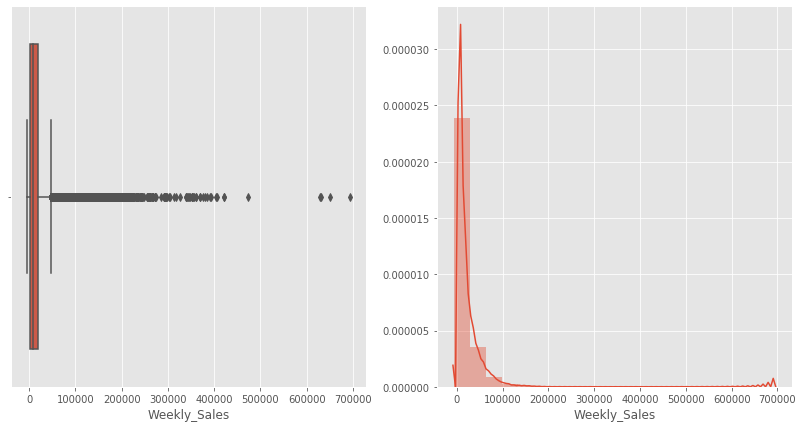

In [7]:
#---- Visualize the response variable (weekly_sales) ----#
EDA_plot_num_var(df_cleaned, 'Weekly_Sales')

### Summary: Weekly Sales ###
First, the box plot shows mean weekly sales is extremely skewed on the lower end. With a lot of outliers outsides of the UB over $100K. Second, the histogram shows the distribution of weekly sales is positively skewed.

In [8]:
#--- Use IQR to detect potential outliers ----#
df_stat_num = EDA_compute_IQR(df_stat_num, 'Weekly_Sales')
# IQR = Q3 - Q1, UB = Q3 + 1.5*IQR, LB = Q1 - 1.5*IQR
    
# Check LB & UB Outliers:
df_cleaned[df_cleaned['Weekly_Sales'] < -25110]
df_cleaned[df_cleaned['Weekly_Sales'] > 47395]

# UB outliers of 35,521 Weekly Sales record over $47,395
df_outliers_UB = df_cleaned[df_cleaned['Weekly_Sales'] > 47395]

# check potential outliers by categorical vars:
# Top sales occured for Dept = 38, Store = 4, Type = A 
df_outliers_UB.describe(include='O').T

#--- Check the suspicious outliers by a store: department and type
df_outliers_UB[(df_outliers_UB['Store'] == 4) & (df_outliers_UB['Dept'] == 38) & (df_outliers_UB['Type'] == 'A')].head()

The LB and UB for suspected Weekly_Sales outliers are -25109.653749999998 and 47395.15625.


,Date,Dept,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Weekly_Sales,Christmas_Eves_yes,Black_Friday_yes,IsHoliday_True,Median_Sales,Date_Lagged_1wk,Lagged_1wk_Sales,Lagged_1wk_Available,Sales_Var_Median_Lagged,Sales_Var_Median_Weekly
34647,2010-02-05,38,4,6.533333,2.598,0.0,0.0,0.0,0.0,0.0,...,88153.66,0,0,0,84060.03,2010-01-29,84060.03,0.0,0.00,-4093.63
34648,2010-02-12,38,4,-1.755556,2.573,0.0,0.0,0.0,0.0,0.0,...,85038.65,0,0,1,85038.65,2010-02-05,88153.66,1.0,-3115.01,0.00
34649,2010-02-19,38,4,2.472222,2.540,0.0,0.0,0.0,0.0,0.0,...,78996.92,0,0,0,84060.03,2010-02-12,85038.65,1.0,-978.62,5063.11
34650,2010-02-26,38,4,5.200000,2.590,0.0,0.0,0.0,0.0,0.0,...,75038.64,0,0,0,84060.03,2010-02-19,78996.92,1.0,5063.11,9021.39
34651,2010-03-05,38,4,6.383333,2.654,0.0,0.0,0.0,0.0,0.0,...,88297.11,0,0,0,86141.34,2010-02-26,75038.64,1.0,11102.70,-2155.77


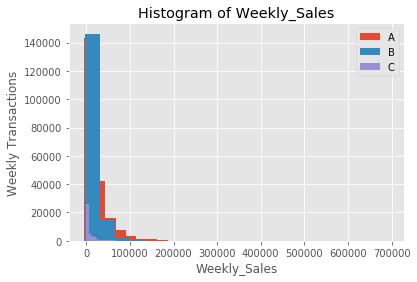

In [9]:
#---- Plot histograms ----#
# Create a list of type
lab_list = list(df_cleaned['Type'].unique())

# Plot multiple histograms on Weekly_Sales by Type:
EDA_plot_hist_label(df_cleaned, 'Weekly_Sales', 'Type', 20, lab_list)
plt.legend()
plt.show()

### Histogram of Weekly Sales by Store Types ###
Histogram shows that there is a overlap in lower range of weekly sales among different store types. 

Whereas upper range of weekly sales shows less overlap among different store types.

skewness is:Temperature -0.321404151969979
skewness is:Fuel_Price -0.10490149562840587
skewness is:CPI 0.08521928473260015
skewness is:Unemployment 1.183742568497432


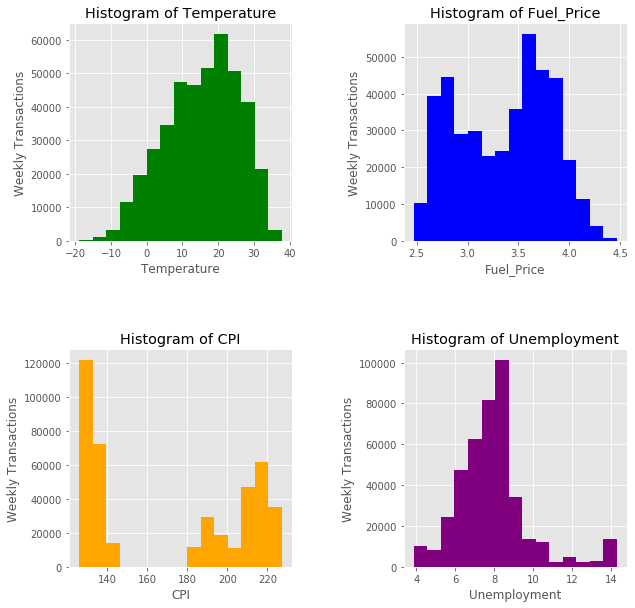

Index(['Date', 'Dept', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Weekly_Sales', 'Christmas_Eves_yes',
       'Black_Friday_yes', 'IsHoliday_True', 'Median_Sales', 'Date_Lagged_1wk',
       'Lagged_1wk_Sales', 'Lagged_1wk_Available', 'Sales_Var_Median_Lagged',
       'Sales_Var_Median_Weekly'],
      dtype='object')

In [10]:
# Plot 2by2 histogram as a subplot: demographic    
EDA_plot_hist_2by2(df_cleaned, 'Temperature', 15,
                   'Fuel_Price', 15,
                   'CPI', 15, 'Unemployment', 15, 1)
plt.show()

df_cleaned.columns

### Summary: Numerical Indicators ###
1. Temperature: shows distribution is not normal. Majority of weekly transactions occurred over 10 Celcius.
2. Fuel Price: shows distribution is skewed to left. Majority of weekly transactions occurred at 3.5 USD/Gallon.
3. Consumer Price Index: shows distribution is skewed to right. Majority of weekly transactions occurred below the CPI 140.
4. Unemployment: shows distribution is skewed to right. Majority of weekly transactions occurred around 8% rate.

In [11]:
################################
# Data Transformation: SplitBy #
################################
# Split dataframes: IsHoliday Yes/No    
df_holiday_0, df_holiday_1 = split_data_by_label(df_cleaned, 'IsHoliday_True')

# Split dataframes: Black_Friday Yes/No    
#df_Black_Friday_0, df_Black_Friday_1 = split_data_by_label(df_cleaned, 'Black_Friday_yes')

# Split dataframes: Christmas_Eves Yes/No    
#df_Christmas_Eves_0, df_Christmas_Eves_1 = split_data_by_label(df_cleaned, 'Christmas_Eves_yes')

#####################################
# Data Transformation: GroupBy Type #
#####################################
df_grp_Type_0, df_grp_Type_1 = group_data_by_label(df_cleaned, 'IsHoliday_True', 'Type')

C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:130: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


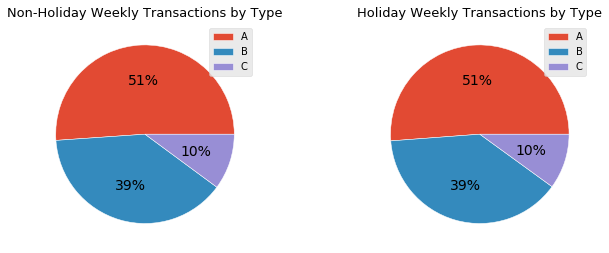

In [12]:
# Plot pie charts:    
plot_pie_charts(df_grp_Type_0, df_grp_Type_1, df_grp_Type_0.index, 'Type')

### Summary: Pie Chart - Store Type ###
Regardless of being holiday or non-holiday weeks, % of transactions are in order of A > B > C for different store types.

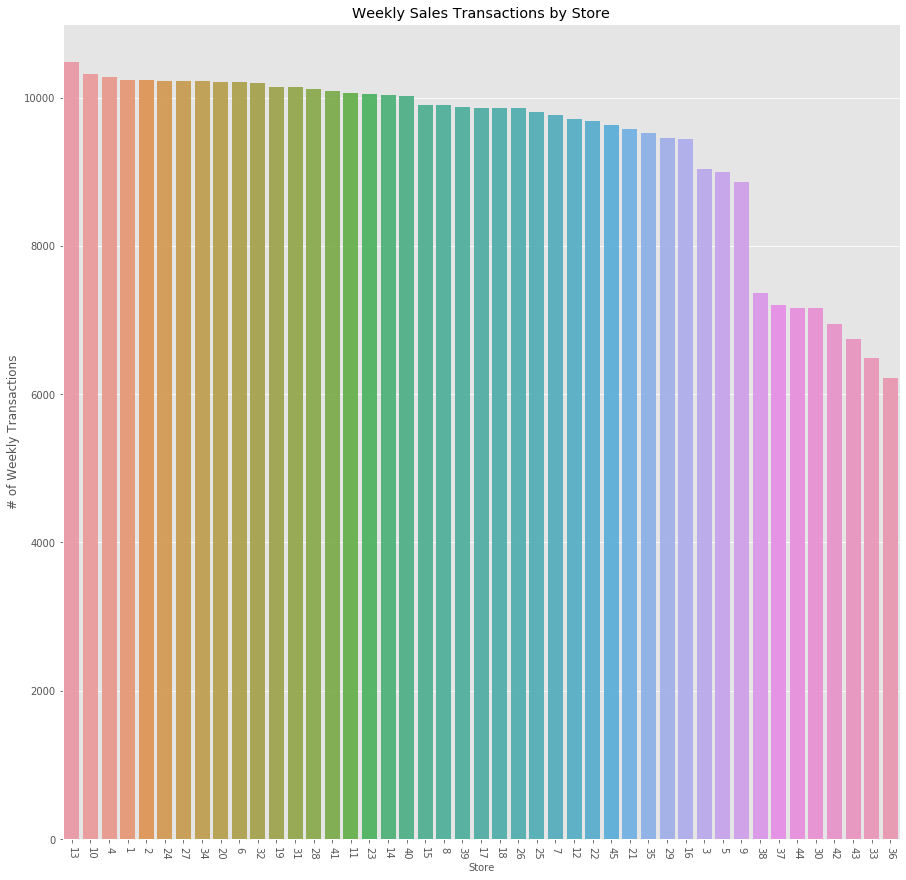

In [13]:
#---- Plot bar/frequency chart(s) ----#
# Compute freq. chart by Store    
EDA_plot_freq_chart(df_cleaned, 'Store')

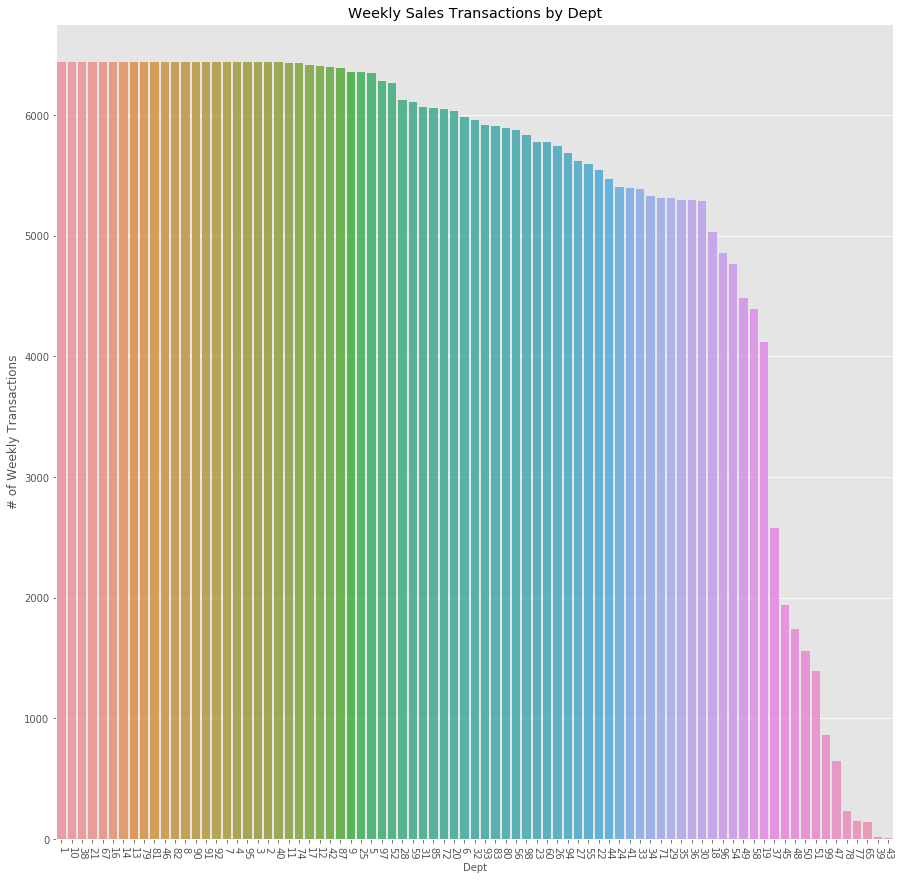

In [14]:
# Compute freq. chart by Department
EDA_plot_freq_chart(df_cleaned, 'Dept')

### Summary: Frequency Chart - Store & Department ###
1. Store: Top 5 Weekly transactions are made from Store ID 13, 10, 4, 1 and 2 over 10,000.
2. Department: Top 5 Weekly transactions are made from Department ID 1, 10, 38, 21 and 67 over 6,000.

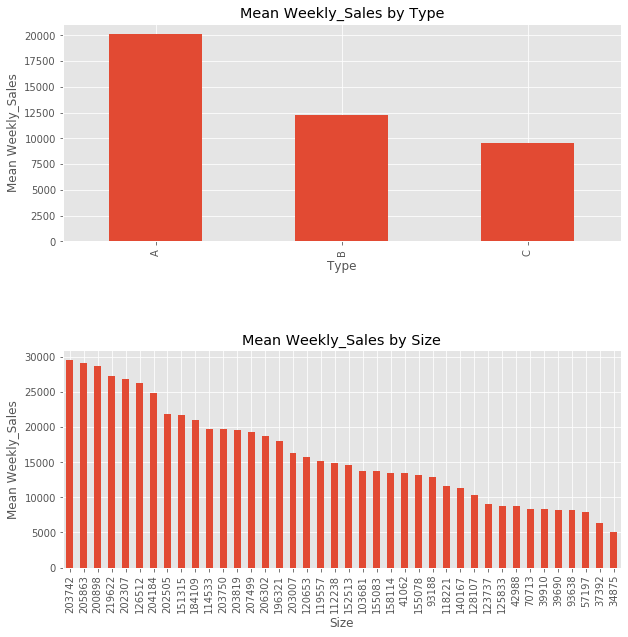

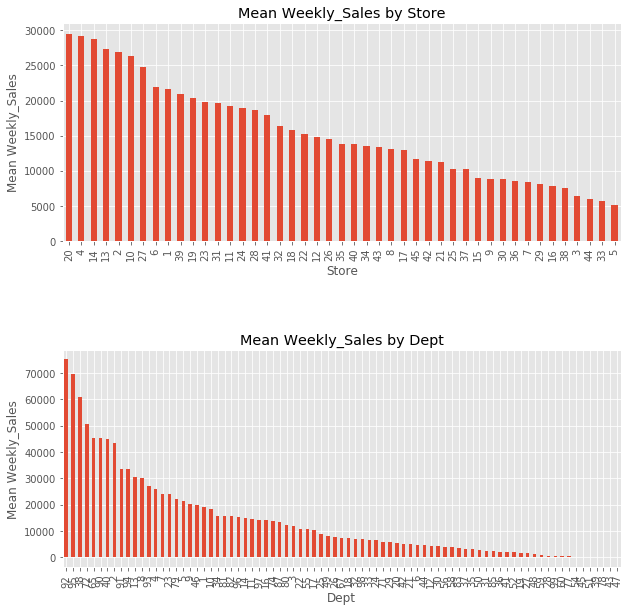

In [15]:
# Plot avg. label bar charts by categorical vars

# Compute 2by1 avg. weekly sales by Type and Size:    
EDA_plot_mean_cat_chart(df_cleaned, 'Weekly_Sales', 'Type', 'Size')

# Compute 2by1 avg. weekly sales by Store and Dept:
EDA_plot_mean_cat_chart(df_cleaned, 'Weekly_Sales', 'Store', 'Dept')

### Summary: Mean Categorical Chart ###
Type & Size: 
* Highest Mean Weekly Sales - store type A & the largest store size
* Lowest Mean Weekly Sales - store type C & the smallest store size

Store & Department: 
* Highest Mean Weekly Sales - store ID 20 & Dept. 92
* Lowest Mean Weekly Sales - store ID 5 &  Dept. 77

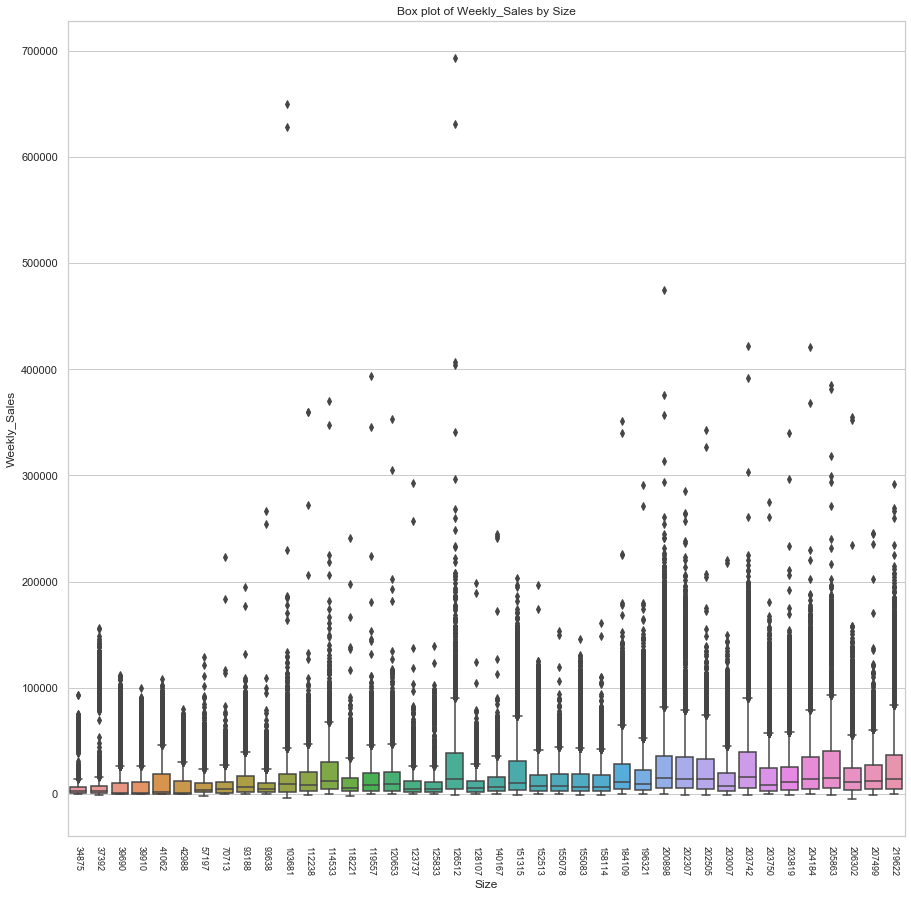

In [16]:
EDA_plot_box(df_cleaned, 'Weekly_Sales', 'Size')

### Summary: Box-Whisker Plots by Categorical Variables ###
Size: In general, there is a trend of increased in Weekly Sales with increase size of a store.

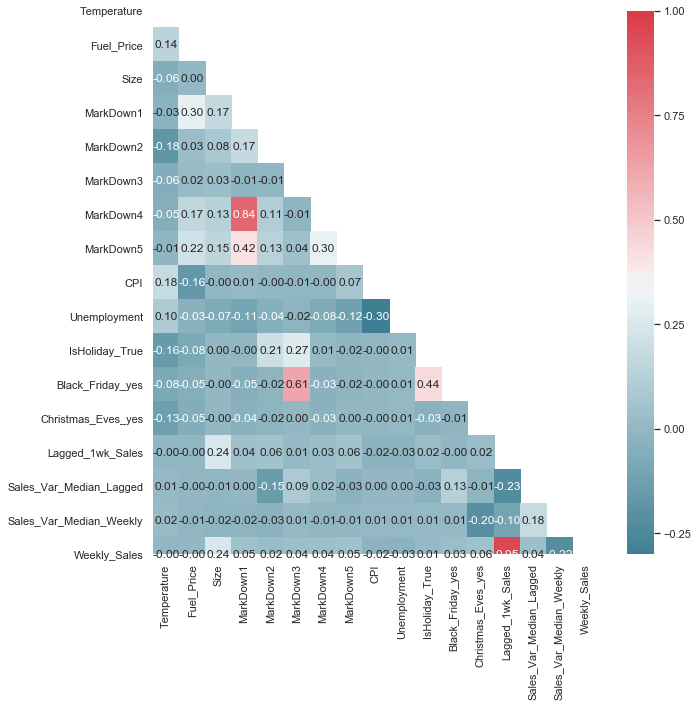

In [17]:
#---- Convert categorical variable data type from object to category ----#
EDA_convert_object_to_cat(df_cleaned)

#---- Encode categorical variables using avg. salary for each category to replace label ----#
df_cleaned.columns

#---- Plot correlation matrix chart ----#
# Define list of features and label
features = ['Temperature', 'Fuel_Price', 'Size', 'MarkDown1',
            'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
            'Unemployment', 'IsHoliday_True', 'Black_Friday_yes' , 'Christmas_Eves_yes',
            'Lagged_1wk_Sales', 'Sales_Var_Median_Lagged', 'Sales_Var_Median_Weekly']
label = ['Weekly_Sales']
    
EDA_plot_corr_matrix(df_cleaned)

### Summary: Correlation Matrix ###
Here is the order of feature(s) that are correlate with a weekly sales:
* "1 week lagged weekly sales" > "store size" > "variance from median to weekly sales".

Also, following trends are observed here:
* Strong Positive Correlation (r-value = 0.95): 1 week lagged weekly sales and weekly sales.
* Moderate Positive Correlation (r-value = 0.24): Size and weekly sales.
* Moderate Negative Correlation (r-value = -0.22): variance from median to weekly sales and weekly sales. 

In [18]:
#---- Plot a cross-tabulate based on two categorical variables ----#    
df_ct_1 = EDA_plot_crosstab(df_cleaned, 'Type', 'Dept')
df_ct_1

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Type,,,,,,,,,,,,,,,,,,,,,
A,3146,3146,3146,3146,3115,2905,3146,3146,3067,3146,...,3146,3146,3146,3146,3146,3146,2728,3146,3146,829
B,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,...,2431,2431,2431,1909,1681,2431,1268,2274,1832,12
C,858,858,858,858,801,650,858,858,856,858,...,858,858,858,858,858,858,858,858,858,21


In [19]:
df_ct_2 = EDA_plot_crosstab(df_cleaned, 'Type', 'Store')
df_ct_2

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Type,,,,,,,,,,,,,,,,,,,,,
A,10244,10238,0,10272,0,10211,0,9895,0,0,...,6222,0,0,9878,10017,10088,0,0,0,0
B,0,0,9036,0,8999,0,9762,0,8867,10315,...,0,0,0,0,0,0,0,0,0,9637
C,0,0,0,0,0,0,0,0,0,0,...,0,7206,7362,0,0,0,6953,6751,7169,0


### Summary: Cross Tabulation ###
1. Department and Type: a lot of weekly transactions occurred within Type A across different departments.
2. Store and Type: there is a huge variance in weekly transactions across the different stores by store type (A, B, C). 

For example, the highest sales made in Store # 4 for Type A, the highest sales made in Store # 10 for Type B and etc.

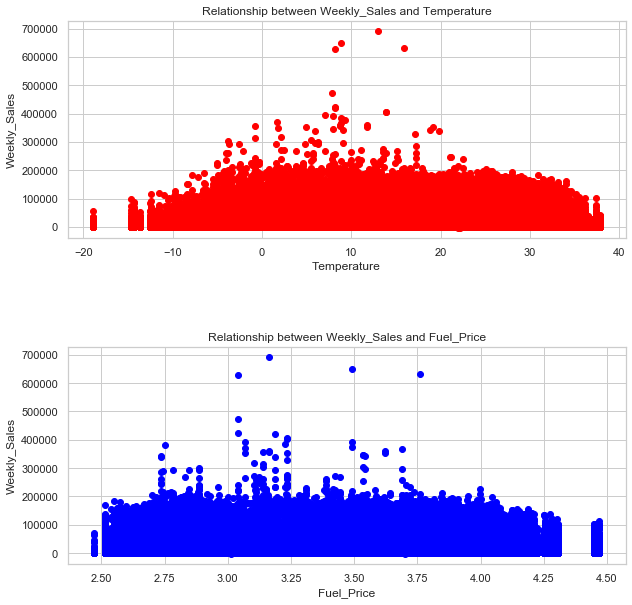

In [20]:
#---- Plot a scatter plot: numerical and categorical variables ----#        
EDA_plot_scatter(df_cleaned, 'Weekly_Sales', 'Temperature', 'red', 
                 'Fuel_Price', 'blue', 1)

### Summary: Scatter Plot - temperatre/fuel_price vs. weekly sales ###
1. Temperature: with increase in room temperatrue, higher the weekly sales until it reached 10 Celcius.
2. Fuel Price: with increase in fuel price, a slight increase in weekly sales but it remains inconculsive.

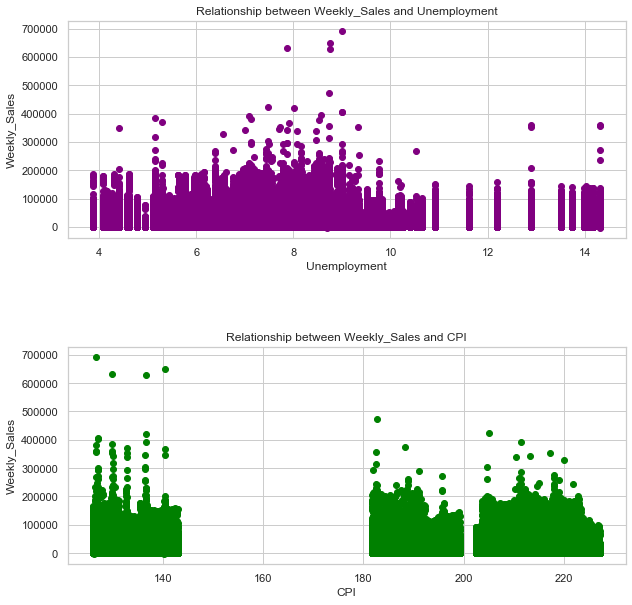

In [21]:
EDA_plot_scatter(df_cleaned, 'Weekly_Sales', 'Unemployment', 'purple', 
                 'CPI', 'green', 1)

### Summary: Scatter Plot - unemployment rate/CPI vs. weekly sales ###
1. Unemployment: shows decrease in weekly sales with increase unemployment %. However, it seems unclear.
2. CPI: shows decrease in weekly sales with increase in "CPI". Also, note there is a gap of CPI between 150 to 180.

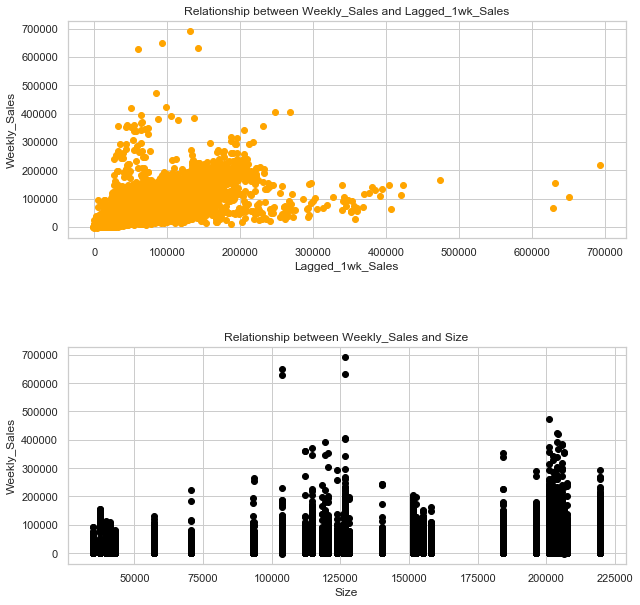

In [22]:
EDA_plot_scatter(df_cleaned, 'Weekly_Sales', 'Lagged_1wk_Sales', 'orange', 
                 'Size', 'black', 1)

### Summary: Scatter Plot - lagged 1wk sales/size vs. weekly sales ###
1. lagged 1 week sales: shows higher weekly sales with increase in lagged 1 week sales. However, the relationship is not a straight linear.
2. Size: shows higher weekly sales with increase in "Size".

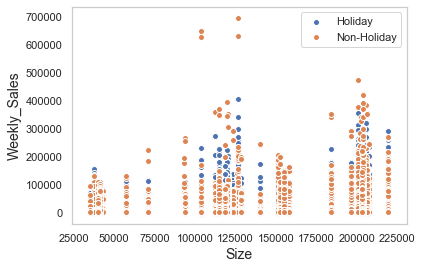

In [23]:
#---- Plot multi-faceted scatter plots by categorical variable ----#    
EDA_plot_multi_facet_scatter(df_holiday_0, df_holiday_1, 
                             'Size', 'Weekly_Sales')

### Summary: Multi-Faceted Scatter Plot by Holiday vs Non-Holiday Weeks ###
Holiday weeks have a stronger tendency of higher weekly sales in comparison to non-holiday weeks.

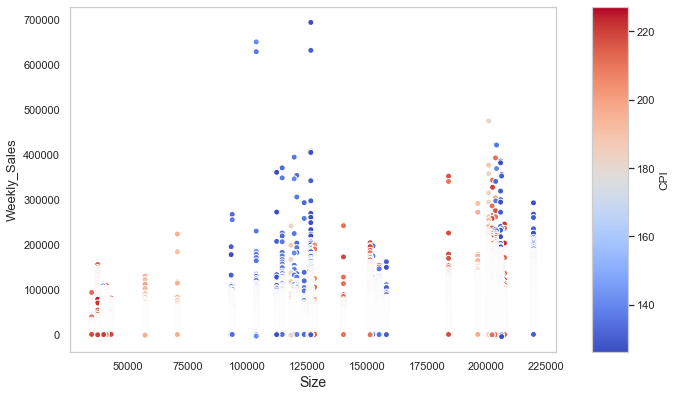

In [24]:
#---- Plot color scaled scatter plots by numerical variable ----#
EDA_plot_color_sc_scatter(df_cleaned, 'Size', 'Weekly_Sales', 'CPI')

### Summary: Color Scaled Scatter Plots ###
NOTE: high CPI weekly sales were observed at a larger store (over 200,000) in comparison to a smaller store (less than 50,00)